# Una corta introducción a PyTorch

### Instalación

Antes que nada, para aprender las bases de PyTorch (e incluso para redes MLP) no es necesario una GPU, así que podemos instalar la librería en nuestro ambiente de conda. O la otra opción, muy práctica y potente es usar https://colab.research.google.com/

Si queremos instalar en nuestro equipo (sin GPU) basta con ir a pytorch.org y allí encontrarán la instrucción básica. Yo he usado la siguiente:

![](img/pytorch_install_cpu.png)

## Cuestiones básicas de PyTorch

#### ¿Cuál es la diferencia entre los arrays de numpy y pytorch?

1. Los array de numpy son la funcionalidad principal de numpy y son diseñados para admitir operaciones matemáticas más rápidas. A diferencia de la estructura de datos de lista incorporada de Python, solo pueden contener elementos de un solo tipo de datos. La librería como pandas que se usa para el preprocesamiento de datos se construye alrededor del array de numpy. Los tensores Pytorch son similares a los array de numpy, pero también se pueden operar en una GPU Nvidia compatible con CUDA.
2. Los array de Numpy se utilizan principalmente en algoritmos típicos de aprendizaje automático (como k-means o Decision Tree en scikit-learn), mientras que los tensores de pytorch se utilizan principalmente en deep learning  que requiere un cálculo matricial pesado.

3. A diferencia de los arrays de numpy, mientras se crea el tensor de pytorch, también acepta otros dos argumentos llamados `device_type`(si el cálculo ocurre en la CPU o GPU) y `requires_grad` (que se usa para calcular las derivadas automáticamente).

In [1]:
import numpy as np
import torch
from numpy import array
from torch import tensor

import matplotlib.pyplot as plt
%matplotlib inline

#### Arrays de numpy

In [2]:
a1 = array([1,2,3])
a2 = np.random.rand(3,3)

print(a1)
print(type(a1),a1.dtype)
print(a2)
print(type(a2),a2.dtype)


[1 2 3]
<class 'numpy.ndarray'> int64
[[0.26461161 0.27754175 0.79427124]
 [0.75524405 0.62581202 0.65705126]
 [0.69021281 0.64113486 0.09589059]]
<class 'numpy.ndarray'> float64


#### Tensores de pytorch

In [3]:
t1 = tensor([1,2,3])
t2 = torch.rand(3,3)
print(t1)
print(type(t1),t1.dtype)
print(t2)
print(type(t2),t2.dtype)

tensor([1, 2, 3])
<class 'torch.Tensor'> torch.int64
tensor([[0.9038, 0.6596, 0.3482],
        [0.5571, 0.6842, 0.7765],
        [0.4726, 0.7765, 0.5907]])
<class 'torch.Tensor'> torch.float32


Se puede convertir muy fácil un array de numpy a un tensor de pytorch:

In [4]:
t3 = tensor(a1)
print(t3)
print(type(t3),t3.dtype)

tensor([1, 2, 3])
<class 'torch.Tensor'> torch.int64


Y un tensor de pytorch a un array de numpy, también es muy fácil:

In [5]:
a3 = t1.numpy()
print(a3)
print(type(a3),a3.dtype)

[1 2 3]
<class 'numpy.ndarray'> int64


El tamaño (shape)  en numpy y pytorch es igual!

In [6]:
print(a1.shape)
print(t1.shape)

(3,)
torch.Size([3])


In [7]:
print(a2.shape)
print(t2.shape)

(3, 3)
torch.Size([3, 3])


El número de dimensiones es casi igual:

In [8]:
print(a2.ndim) # numpy
print(t2.dim()) # pytorch

2
2


Cambio de shape en numpy:

In [9]:
a4 = np.arange(9)
print(a4)
a4.reshape(3,3)

[0 1 2 3 4 5 6 7 8]


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Cambio de shape en pytorch:

In [10]:
t4 = torch.arange(9)
print(t4)
t4.reshape(3,3)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [11]:
t4.view(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

Añadir una dimensión en numpy:

In [12]:
print(a1.shape)
print(np.expand_dims(a1,axis=0).shape)
print(a1.reshape(1,-1).shape)

(3,)
(1, 3)
(1, 3)


Añadir una dimensión en torch:

In [13]:
print(t1.shape)
print(t1.unsqueeze(0).shape)
print(t1.view(1,-1).shape)

torch.Size([3])
torch.Size([1, 3])
torch.Size([1, 3])


Recorrer (slicing) arrays de numpy y tensores de pytorch es igual

In [14]:
t5 = torch.rand(3, 4)
a5 = np.random.rand(3, 4)

t5[:, 2] = 23 # reemplaza cada elemento de la tercera columna por 23 
a5[:, 2] = 223 # reemplaza cada elemento de la tercera columna por 223

t5[0] = 999 # reemplaza cada elemento de la primera fila por 999
a5[0] = 9999 # reemplaza cada elemento de la primera fila por 9999

print(t5)
print(a5)

tensor([[9.9900e+02, 9.9900e+02, 9.9900e+02, 9.9900e+02],
        [7.1073e-02, 9.3472e-01, 2.3000e+01, 1.8131e-01],
        [1.7802e-01, 5.9441e-01, 2.3000e+01, 2.3307e-01]])
[[9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03]
 [8.58973130e-01 7.98507191e-01 2.23000000e+02 4.13628561e-01]
 [8.08916297e-01 7.06504366e-03 2.23000000e+02 9.06337480e-01]]


Tensores ceros, unos y aleatorios (distribución normal):

In [15]:
#Numpy

zeros  = np.zeros((4, 4))
ones   = np.ones((4, 4))
random = np.random.randn(4, 4)

print(zeros);print(ones); print(random)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[ 0.14351584  0.42511939  0.52467271 -0.02436935]
 [ 0.49549988  0.99289138  1.44757738 -0.83640028]
 [-0.99573184  0.69058938 -0.78757832 -0.99918688]
 [-0.64689454 -1.35851855 -0.50188169  2.03546511]]


In [16]:
# PyTorch

tzeros  = torch.zeros(4, 4)
tones   = torch.ones(4, 4)
trandom = torch.randn(4, 4)

print(tzeros);print(tones); print(trandom)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[-0.5097,  0.5267, -1.4967, -0.6202],
        [ 1.2810, -2.1684,  1.1418,  0.1682],
        [ 0.0468, -0.1724, -0.9655,  0.1437],
        [-1.6234, -0.8607,  1.8971,  0.3972]])


#### Álgebra Simple

De Álgebra hay muchas instrucciones y formas (por ejemplo  `np.dot()`es equivalente a `torch.mm()`), sin embargo aquí veremos las más simples (pero tampoco las obvias como la suma `+`, resta `-` y la multiplicación elemento a elemento `*` que es igual). 

**Multiplicación de matrices**

Numpy

In [17]:
a2 @ a1 

array([3.20250883, 3.97802186, 2.26015431])

PyTorch

In [18]:
t2 @ t1.float() # hay que cambiar a tipos equivalentes

tensor([3.2676, 4.2550, 3.7976])

Determinantes

In [19]:
np.linalg.det(a2) # numpy

0.051692563751665706

In [20]:
torch.det(t2) # pytorch

tensor(-0.1167)

**Inversa de una matriz**

Numpy

In [21]:
np.linalg.inv(a2)

array([[ -6.98841286,   9.33637837,  -6.0880194 ],
       [  7.37213186, -10.11446105,   8.24113186],
       [  1.01116693,   0.42387421,  -0.85146925]])

In [22]:
np.linalg.pinv(a2)

array([[ -6.98841286,   9.33637837,  -6.0880194 ],
       [  7.37213186, -10.11446105,   8.24113186],
       [  1.01116693,   0.42387421,  -0.85146925]])

Pytorch

In [23]:
t2.inverse() # o torch.inverse(t2)

tensor([[ 1.7043,  1.0225, -2.3488],
        [-0.3250, -3.1662,  4.3537],
        [-0.9363,  3.3438, -2.1509]])

In [24]:
t2.pinverse() # o torch.pinverse(t2)

tensor([[ 1.7043,  1.0225, -2.3488],
        [-0.3250, -3.1662,  4.3537],
        [-0.9363,  3.3438, -2.1509]])

**Transpuesta**

In [25]:
# Numpy
a2.T # o a2.transpose(1,0)

array([[0.26461161, 0.75524405, 0.69021281],
       [0.27754175, 0.62581202, 0.64113486],
       [0.79427124, 0.65705126, 0.09589059]])

In [26]:
#Pytorch
t2.t() # o t2.transpose(1,0)

tensor([[0.9038, 0.5571, 0.4726],
        [0.6596, 0.6842, 0.7765],
        [0.3482, 0.7765, 0.5907]])

**Otras operaciones**

Numpy

In [27]:
# Sum
print( a1.sum() )

# Mean
print( a1.mean() )

# Standard Deviation
print( a1.std() )

6
2.0
0.816496580927726


Pytorch

In [28]:
# Sum
print( t1.sum() )

# Mean
print( t1.float().mean() ) # Solo soporta el typo float()

# Standard Deviation
print( t1.float().std() ) # Solo soporta el typo float()


tensor(6)
tensor(2.)
tensor(1.)


In [14]:
tt = tensor([1.,2.,3.])
((tt - tt.mean())**2).sum()/2

tensor(1.)

Pueden encontrar muchos más métodos y propiedades en https://pytorch.org/docs/stable/tensors.html (por ejemplo, pasar un tensor a la GPU)

### Calculando gradientes automáticamente con PyTorch

Este es uno de los más grandes poderes de pytorch (además de poder usar GPUs).  Veamos este fantástico proceso con ejemplos sencillos

Creemos una función:

In [29]:
def f(x): return x**2

Ahora definamos un tensor pero con un método especial:

In [30]:
x = tensor(3.).requires_grad_()

Este método `requires_grad_` (cuidado con el _ ) le dice a PyTorch que calcule los gradientes con respecto a la variable en ese valor particular. Básicamente se trata de etiquetar la variable, por lo que PyTorch recordará realizar un seguimiento de cómo calcular los gradientes del otro, los cálculos directos que usted le solicitará.

Ahora calculemos la salida de la función respecto a ese valor particular:

In [31]:
y = f(x)
y

tensor(9., grad_fn=<PowBackward0>)

Pytorch no solo ha calculado el valor de salida, sino también muestra que tiene una función para calcular el gradiente cuando lo necesite.

Ahora calculemos el gradiente:

In [32]:
y.backward()

El "backward" aquí se refiere a al *backpropagation*, que es el nombre que se le da al proceso de cálculo de la derivada de cada capa. Esto se denomina "paso hacía atras" (backward pass) de la red, a diferencia del "paso hacia adelante" (forward pass), que es donde se calculan las activaciones. 

Ahora miremos el cálculo del gradiente mediante el atributo `grad`del tensor (si, almacena el gradiente de *f* respecto a *x* en el tensor *x*).

In [33]:
x.grad

tensor(6.)

Que pasa si definimos un nuevo x y calculamos el gradiente:

In [34]:
x = tensor(2.).requires_grad_()
y=f(x)
x.grad

Ahora si calculemos un verdadero gradiente (hasta ahora era una simple derivada): 

In [35]:
x = tensor([3.,4.,10.], requires_grad=True) # Otra forma de indicar el calculo de gradiente
x

tensor([ 3.,  4., 10.], requires_grad=True)

Redefinamos la función para que contenga un `sum()`y así retorne un escalar:

In [36]:
def f(x): return (x**2).sum()

y evaluemos

In [37]:
y = f(x)
y

tensor(125., grad_fn=<SumBackward0>)

Ahora miremos que resulta el gradiente de *f* respecto al vector *x*:

In [38]:
y.backward()
x.grad

tensor([ 6.,  8., 20.])

¡Efectivamente da el gradiente!

## Un ejemplo sencillo del gradiente descendiente estocástico (SGD)

Imaginemos que estamos midiendo la velocidad de una montaña rusa al pasar por encima de una joroba. Comenzaría rápido y luego se volvería más lento a medida que sube cuesta arriba; sería más lento en la parte superior, y luego volvería a acelerar a medida que avanzaba cuesta abajo. Deseamos construir un modelo de cómo cambia la velocidad con el tiempo. Si estuvieramos midiendo la velocidad manualmente cada segundo durante 20 segundos, podría verse así:

In [39]:
torch.manual_seed(123); # Fijando una semilla en PyTorch

In [40]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

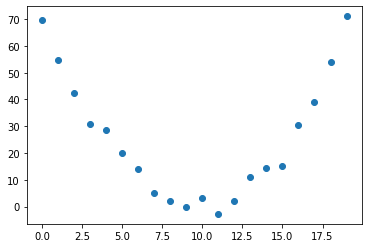

In [41]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

Hemos añadido ruido aleatorio para simular que el experimento no es preciso. Deseamos encontrar un modelo que se ajuste a los datos que hemos "tomado". Por ejemplo, podemos suponer que nuestro modelo es $a(time²)+b(time)+c$. Para encontrar el modelo podemos usar el SGD y encontrar los parámetros que minimicen una función de costo que podría ser el MSE.  

Construyamos la función del modelo:

In [61]:
def f(t,params):
    a,b,c = params
    return a*(t**2) + b*t + c

En otras palabras vamos a realizar un ajuste cuadrático. 

Ahora definamos la función de costo:

In [43]:
def mse(preds, targets): return ( (preds - targets)**2 ).mean().sqrt()

##### Inicialicemos los parámetros

In [62]:
params = torch.randn(3).requires_grad_()
params

tensor([ 1.4220, -0.3886, -0.8903], requires_grad=True)

##### Calculemos las prediciones
(con la inicialización aleatoria)

In [63]:
preds = f(time, params)

Grafiquemos las predicciones respecto a los datos originales:

In [46]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    # Es necesario .detach() para quitar la variable del grafo y poder pasarlo a numpy
    ax.scatter(time, preds.detach().numpy(), color='red') 
    ax.set_ylim(-300,100)

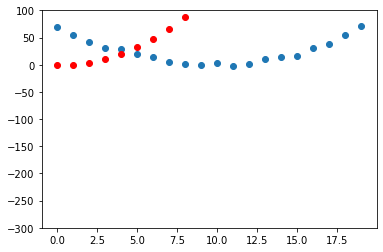

In [64]:
show_preds(preds)

##### Calculemos el costo

In [65]:
loss = mse(preds, speed)
loss

tensor(213.5707, grad_fn=<SqrtBackward0>)

Ahora el objetivo es mejorar esto. Para lograrlo usaremos el gradiente y actualizaremos los parámetros

##### Calculemos los gradientes

In [66]:
loss.backward()
params.grad

tensor([166.4453,  10.6642,   0.6826])

Ahora podemos usar estos gradientes y realizar el paso del gradiente para ir acercándonos al mínimo de la función de costo

##### El paso del gradiente

In [50]:
lr = 1e-5
params -= lr * params.grad
params.grad = None

RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.

¡¿Por qué?! Resulta ser un caso de "demasiado de algo bueno". El culpable es la capacidad de PyTorch para construir un grafo de cálculo dinámico a partir de cada operación de Python que involucre cualquier tensor de cálculo de gradientes o sus dependencias. Lo mejor es decirle a PyTorch que nos deje ejecutar operaciones regulares sobre las operaciones de tensores, independientemente del grafo calculado por PyTorch. Esto se hace con `torch.no_grad()`

In [67]:
lr = 1e-4
with torch.no_grad():
    params -= lr * params.grad
params.grad.zero_() # Ver texto luego el porque

tensor([0., 0., 0.])

Para calcular los gradientes, procedemos hacia atrás con el costo. Pero este costo fue calculado mediante el `mse`, que a su vez tomó `preds` como entrada, que se calculó usando `f` tomando como entrada `params`, que era el objeto en el que originalmente llamamos `required_grad_`, que es el procedimiento original que ahora nos permite ir hacia atrás en el costo. Esta cadena de llamadas a funciones representa la composición matemática de funciones, lo que permite a PyTorch usar la regla de la cadena de cálculo por debajo, para calcular estos gradientes.

En PyTorch, para cada iteración (un batch, un dato, o un minibatch) en la fase de entrenamiento, necesitamos establecer explícitamente los gradientes en cero antes de comenzar a realizar una propagación hacia atrás (es decir, actualización de pesos y bias) porque PyTorch acumula los gradientes en los paso hacia atrás (backward passes). Esto es conveniente por ejemplo al entrenar RNNs. Por lo tanto, la acción predeterminada se ha configurado para acumular (es decir, sumar) los gradientes en cada llamada de `loss.backward()`.

Debido a esto, cuando inicie su ciclo de entrenamiento, idealmente debería poner a cero los gradientes para que realice la actualización de parámetros correctamente. De lo contrario, el gradiente apuntaría en alguna otra dirección que no sea la dirección prevista hacia el mínimo. Esta es la razón por la cual hemos colocado `params.grad.zero_()`.

Miremos si ha mejorado la función de costo (o pérdida):

In [68]:
preds = f(time,params)
mse(preds, speed)

tensor(210.7892, grad_fn=<SqrtBackward0>)

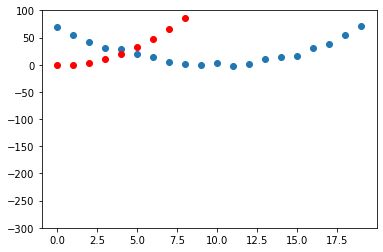

In [69]:
show_preds(preds)

Ahora unamos todo en un sólo paso:

In [71]:
lr = 1e-4
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    with torch.no_grad():
        params -= lr * params.grad
    params.grad.zero_() 
    if prn: print(loss.item())
    return preds

##### Repetición del proceso
Ahora iteremos de forma cíclico para mejorar aún mas:

In [81]:
for i in range(20): preds = apply_step(params)

27.824974060058594
27.554834365844727
27.332765579223633
27.151185989379883
27.003376007080078
26.88351821899414
26.78662872314453
26.708507537841797
26.64565658569336
26.595170974731445
26.55467987060547
26.52223777770996
26.49627113342285
26.475500106811523
26.458892822265625
26.44562530517578
26.435022354125977
26.426557540893555
26.419795989990234
26.41439437866211


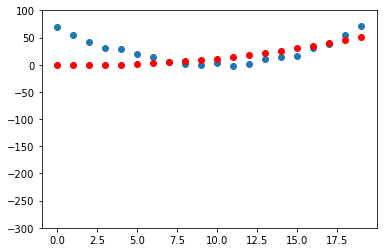

In [82]:
show_preds(preds)

### Ejemplo de AutoGrad

In [58]:
from torch.autograd import grad
import torch.nn.functional as F

Supongamos que tenemos el siguiente gráfico de funciones:

![](img/relu-graph.png)

En PyTorch, la función se define y calcula de la siguiente manera:

In [59]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)

In [60]:
a

tensor([7.], grad_fn=<ReluBackward0>)

Por defecto, PyTorch construirá automáticamente un grafo computacional en segundo plano si las variables tienen el parámetro `require_grad = True` establecido. Si se utilizan nuevas variables sin ese parámetro establecido en `True` en un cálculo con una variable que tiene `require_grad = True`, estas nuevas variables también tendrán gradientes automáticamente configurados en `True` (esto simplemente significa que los gradientes para estas variables se calcularán; es un desperdicio establecerlo en `True` si no necesitamos el gradiente de esa variable; por ejemplo, generalmente no necesitamos los gradientes de las entradas de entrenamiento `x`)

Calculemos la derivada de a con respecto a w:

In [61]:
grad(a, w, retain_graph=True)

(tensor([3.]),)

Arriba, el `retain_graph = True` significa que el grafo de cálculo se mantendrá en la memoria; esto es a modo de ejemplo para que podamos usar la función` grad` nuevamente a continuación. En la práctica, normalmente queremos liberar el grafo del cálculo en cada iteración.

In [62]:
grad(a, b)

(tensor([1.]),)

Tenga en cuenta que las funciones de PyTorch suelen ser más eficientes, pero también podríamos implementar nuestra propia función ReLU como se muestra a continuación:

In [63]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = my_relu(x*w + b)
grad(a, w)

(tensor([3.]),)

### ¿Cómo es el grafo de un multilayer perceptron (3 neuronas ocultas)?

![](img/grafo_MLP.png)